# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 15 баллов
* Задача 3 &mdash; 15 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 20 баллов
* Задача 5 &mdash; 30 баллов





-----

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

%matplotlib inline

### <b><font color="blue">Легкая часть</font></b> 


## Задача 1 на гистограммы и  выборочные статистики.

**1.** Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать [по ссылке](https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality).

In [5]:
airData =  pd.read_csv("airquality.csv")
airData.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


Выведите описательные статистики (метод `describe`) для всех признаков, для которых это имеет смысл.  Округлите до второго знака после запятой.

In [6]:
airData.describe().apply(lambda x: round(x, 2))

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.00,146.00,153.00,153.00,153.00,153.00
mean,42.13,185.93,9.96,77.88,6.99,15.80
std,32.99,90.06,3.52,9.47,1.42,8.86
min,1.00,7.00,1.70,56.00,5.00,1.00
25%,18.00,115.75,7.40,72.00,6.00,8.00
50%,31.50,205.00,9.70,79.00,7.00,16.00
75%,63.25,258.75,11.50,85.00,8.00,23.00
max,168.00,334.00,20.70,97.00,9.00,31.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** 

Для предположения о наличии выбросов сравним медиану и среднее значение(см ячейку ниже).

Согласно этим данным предположу, что выбросы присутствуют в колонках $Solar.R$ и $Ozone$

In [7]:
targetColumns = ["Ozone", "Solar.R", "Wind", "Temp"]

for name, column in airData[targetColumns].iteritems():
    print(f"{name} mean is: {column.mean():.2f} \t and median is: {column.median():.2f}")
    print("Процентная разница = {:.0f}%".format(200 * np.abs(column.mean() - column.median()) / \
                                                         (column.mean() + column.median())))

Ozone mean is: 42.13 	 and median is: 31.50
Процентная разница = 29%
Solar.R mean is: 185.93 	 and median is: 205.00
Процентная разница = 10%
Wind mean is: 9.96 	 and median is: 9.70
Процентная разница = 3%
Temp mean is: 77.88 	 and median is: 79.00
Процентная разница = 1%


/tmp/ipykernel_39554/266508719.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in airData[targetColumns].iteritems():


**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует номеру месяца, а ось `y` — значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

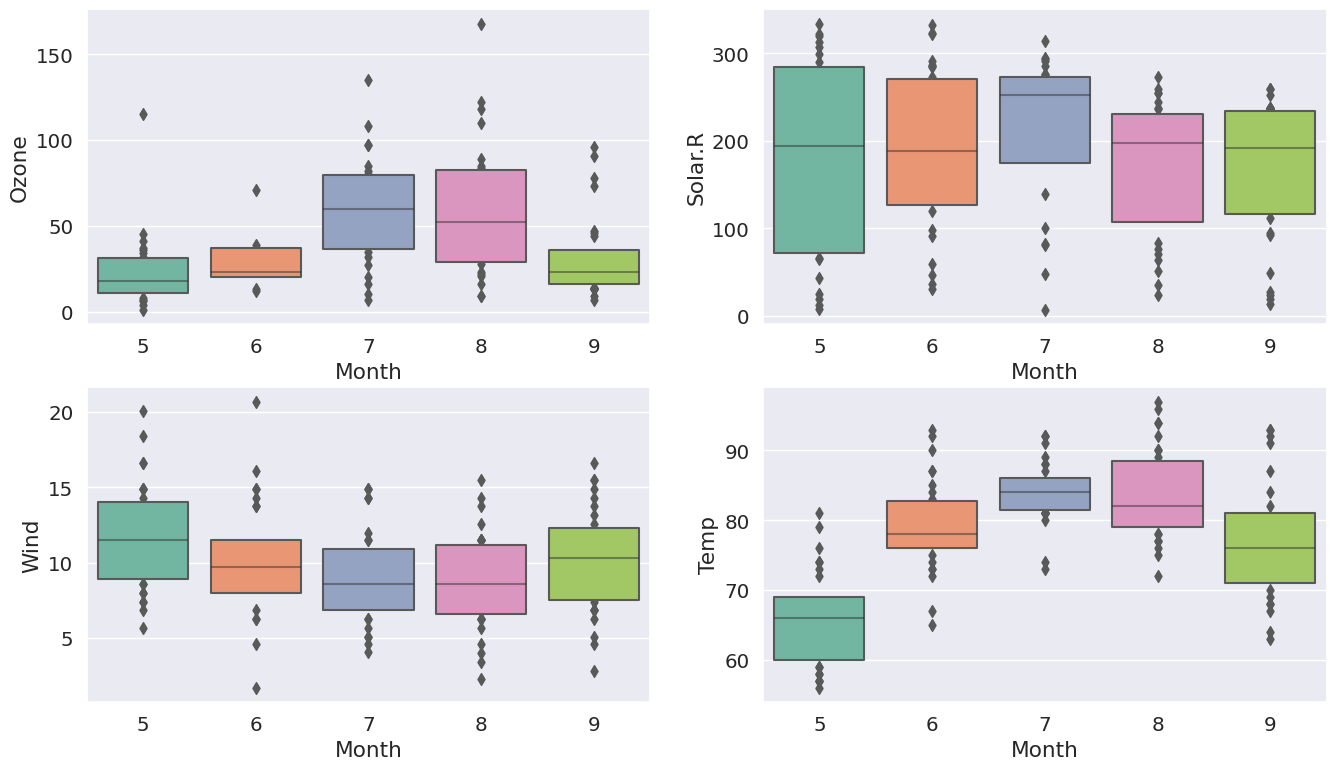

In [8]:

fig, ax = plt.subplots(2, 2, figsize = (16,9), dpi = 100)

for ind, column in enumerate(targetColumns):
    indX, indY = ind // 2, ind % 2
    sns.boxenplot(data = airData,
                  x = "Month", 
                  y = column,
                  ax = ax[indX, indY])
    # ax[indX, indY].axhline(np.mean(airData[column]),
    #                        alpha = 0.7,
    #                        color = 'pink',
    #                        label = 'Среднее')
    # ax[indX, indY].legend()

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:**

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее; 
- выборочную медиану;

In [9]:
print("Колонка Ozone - медиана = {:.2f}, среднее = {:.2f}".format(np.nanmedian(airData.Ozone),
                                                                  np.nanmean(airData.Ozone)))

Колонка Ozone - медиана = 31.50, среднее = 42.13


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:**

При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполнено ли это свойство в данном случае?

**Ответ:**

А оно часто бывает выполнено? Как это можно проверить? Что бывает, когда оно нарушается? Какие вы есть количественные меры зависимости между признаками? Ответы на эти вопросы вы узнаете далее, но задуматься и порассуждать полезно уже сейчас.

**Ответ:**

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.



**Вывод:**

## Задача 2
Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце. Для работы с табличными данными используйте библиотеку `pandas`.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение.
Требуется построить: 
 * асимтотические доверительные интервалы при помощи центральной предельной теоремы;
 * точные неасимптотические при помощи распределений хи-квадрат, Стьюдента.

 
 Запишите их в виде таблицы.

In [ ]:
# ваш код

Сделайте выводы по полученной таблице.

**Вывод:**

## Задача 3

Постройте плотность стандартного **нормального распределения** и стандартного **распределения Коши**. Видим, что распределение Коши обладает более тяжелыми хвостами, нежели нормальное.

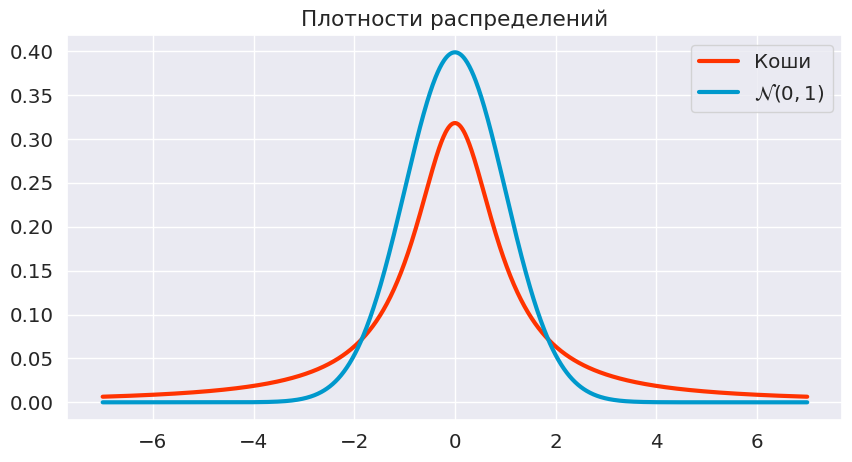

In [15]:
grid = np.linspace(-7, 7, 1000)

plt.figure(figsize=(10, 5))
plt.plot(grid,
          sps.cauchy.pdf(grid), 
          color=red, 
          label='Коши', 
          lw=3)
plt.plot(grid, sps.norm.pdf(grid), color=blue, 
         label='$\mathcal{N}(0, 1)$', lw=3)
plt.title('Плотности распределений')
plt.legend();

Сгенерируйте $10^5$ выборок размера 30 из стандартного **нормального распределения**.

In [ ]:
# ваш код

По каждой выборке из 30 элементов посчитайте выборочные средние. Далее по ним постройте гистограмму и плотность стандартного нормального распределения. Какой вывод вы можете сделать из полученного графика?

In [ ]:
# ваш код

**Вывод:**

Сгенерируем $10^5$ выборок размера 30 из стандартного **распределения Коши**.

In [ ]:
# ваш код

Построим аналогичный график. 

Сравните графики для нормального распределения и для Коши, опишите ваше сравнение в выводе по задаче.

**Вывод:**


### <b><font color="orange">Сложная часть</font></b>

## Задача 4

В этой задаче нужно визуализировать доверительные интервалы для выборки из равномерного распределения $U[0, \theta]$.


1. Постройте асимптотический доверительный интервал для $\theta$, используя асимптотически нормальную оценку $\theta$.




2. Постройте точный доверительный интервал для $\theta$, используя статистику $X_{(n)}$.

    - Найдите функцию распредления $X_{(n)}$ по определению. 
    - Точный доверительный интервал для $\theta$ имеет смысл строить в виде $(X_{(n)}, X_{(n)} + c_{\alpha})$ (поясните почему). 
    - Нужно найти такое $c_{\alpha}$, что $\mathsf{P_{\theta}}(\theta \in (X_{(n)}, X_{(n)} + c_{\alpha})) = \alpha$ 

**Ответ:**

Визуализируйте интервалы. Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя написанную ниже функцию. Нужно нанести на график точки выборки.

Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.

In [ ]:
def draw_confidence_interval(
    left,
    right,
    estimation=None,
    sample=None, 
    ylim=(None, None), 
    estim_label = '',
    sample_label='',
    color=None,
    interval_label=None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param estim_label: подпись к оценке
    :param sample_label: подпись к выборке
    :param color: цвет, которым будет отображен доверительный интервал
    '''
    
    
    # ваш код

**Решение:**

In [ ]:
# ваш код

**Вывод:**


## Задача 5


Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}$.

На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

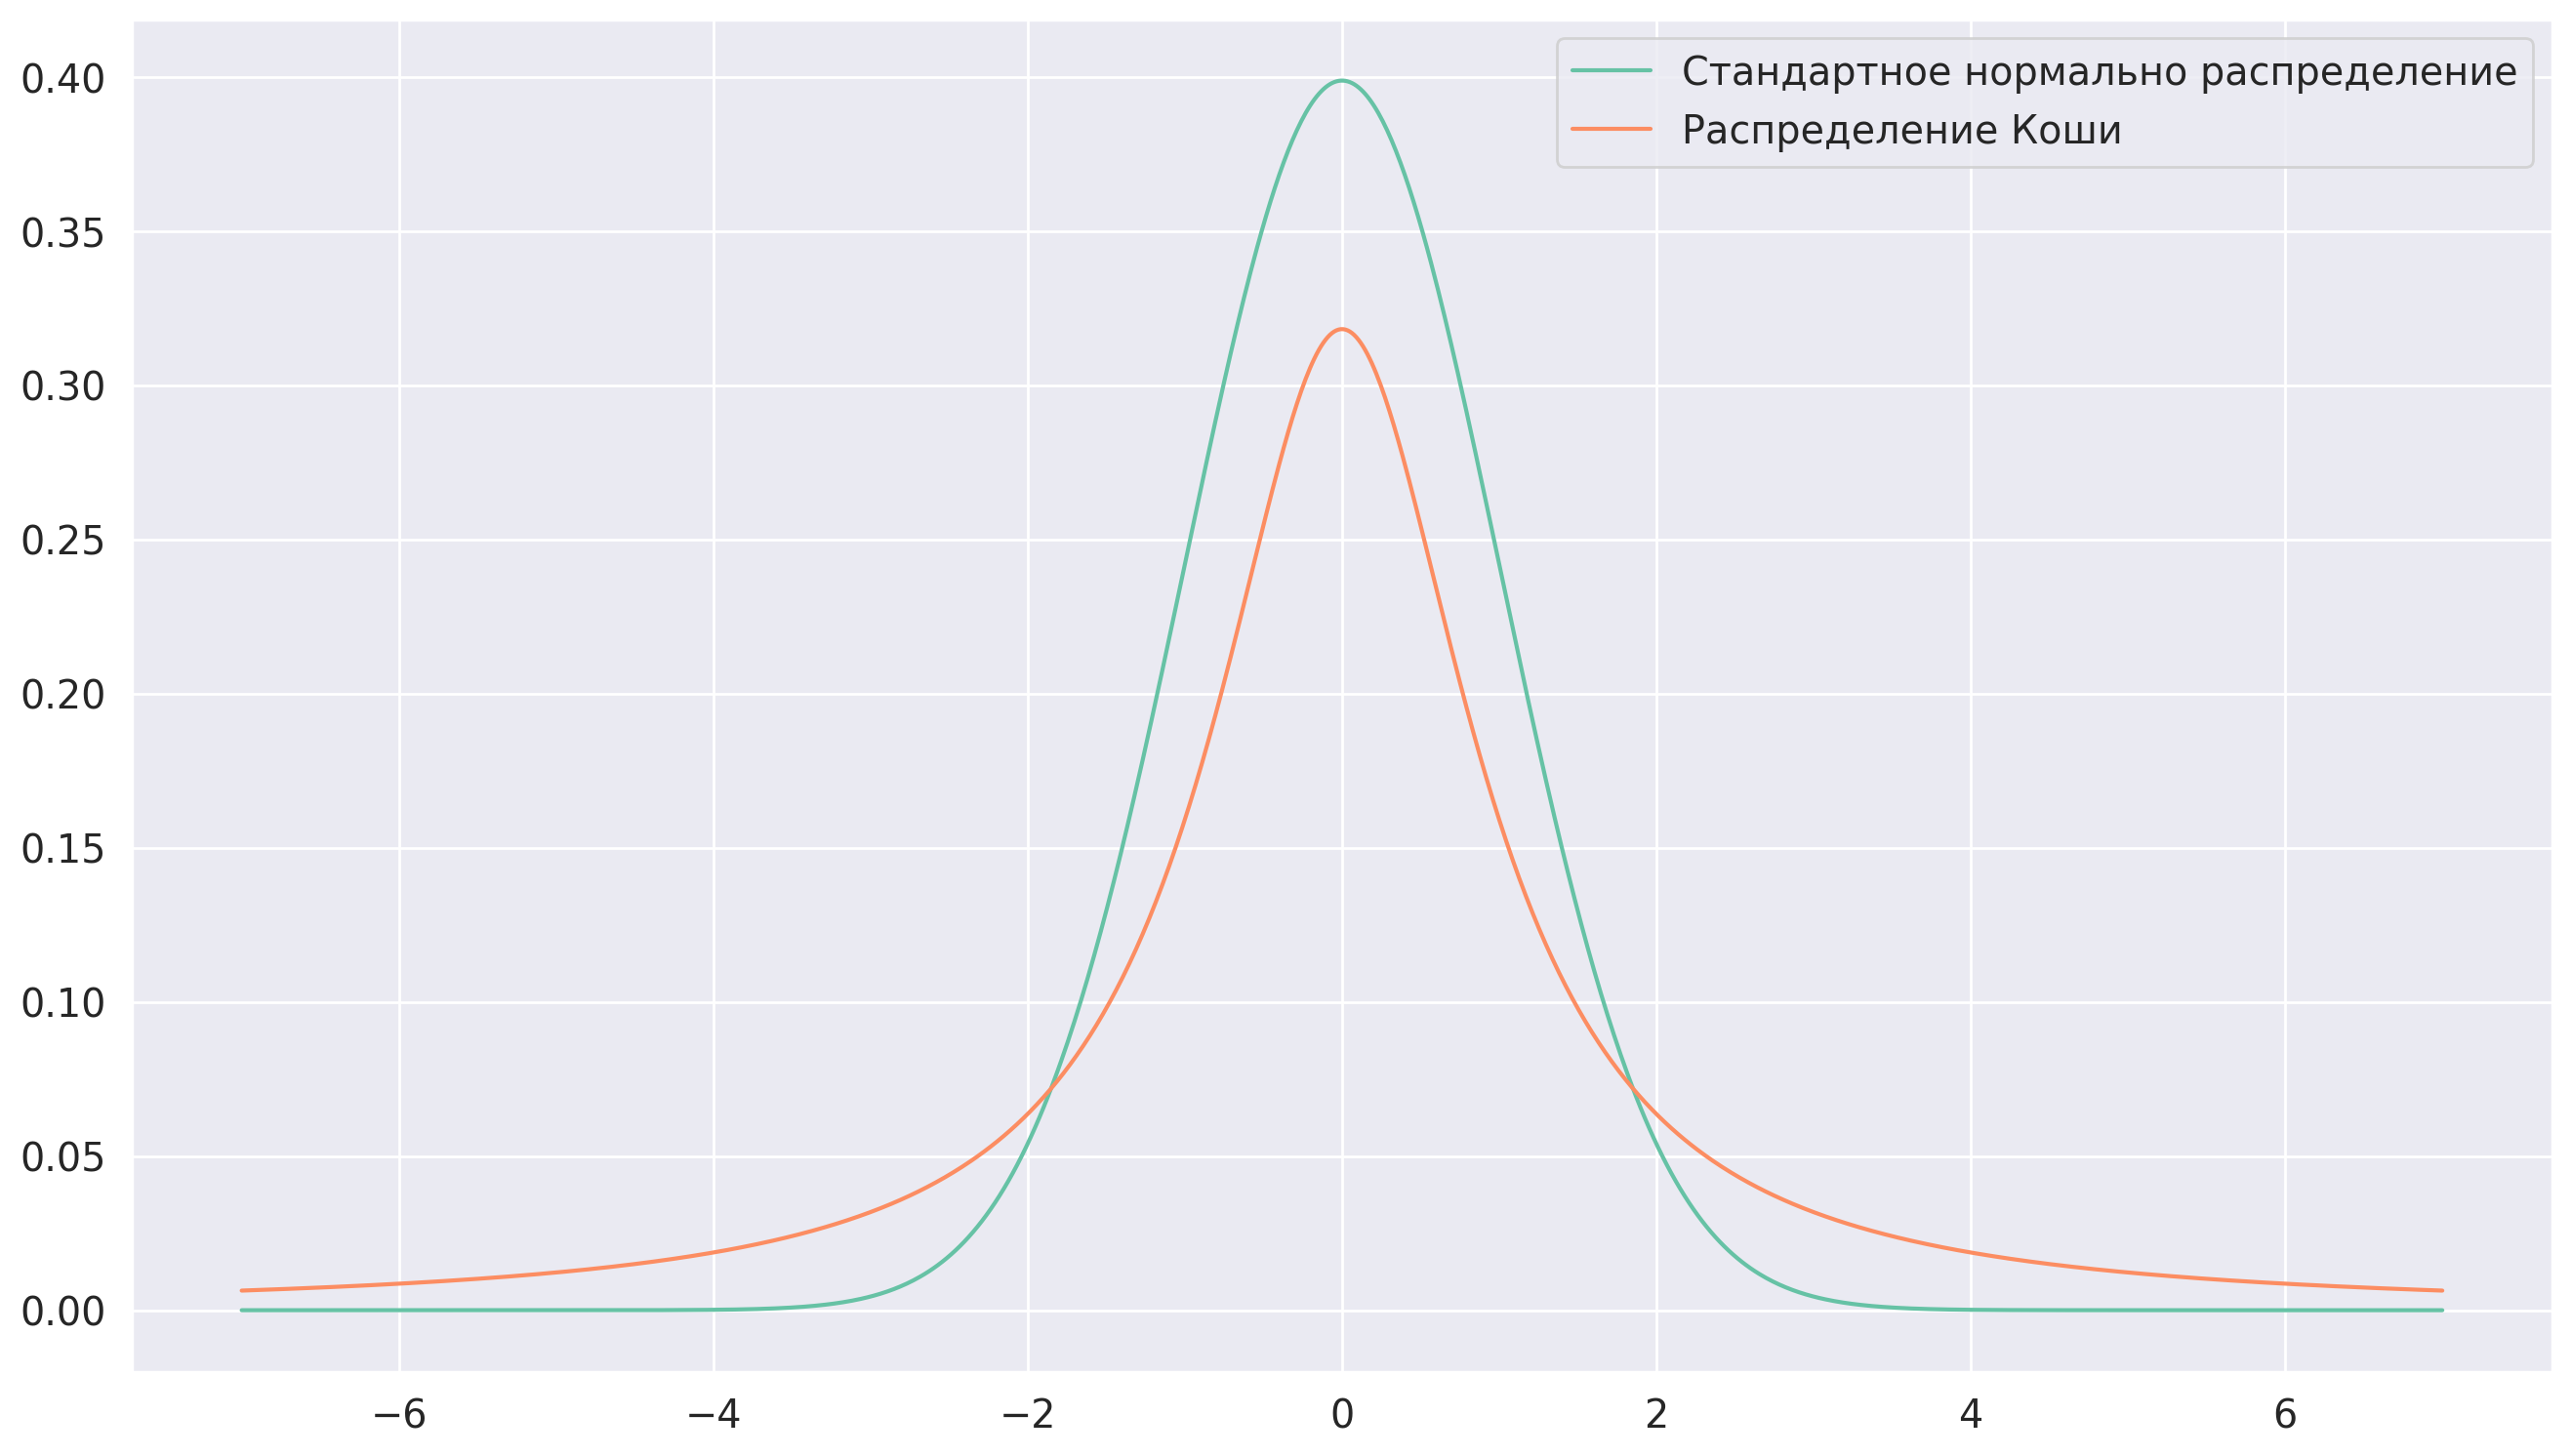

In [26]:
xAx = np.linspace(-7, 7, 1000)

plt.figure(figsize = (16, 9), dpi = 200)
plt.plot(xAx, sps.norm.pdf(xAx), label = 'Стандартное нормально распределение')
plt.plot(xAx, sps.cauchy.pdf(xAx), label = 'Распределение Коши')

plt.legend();


**Вывод:**

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

**Решение:**

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

**Ответ:**<...>

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана;

На графиках изобразите зависимость значений **всех оценок** от $n$ для одной реализации выборки, а на другом графики траекторий по нескольким реализациям. 

Постройте также график, на котором изобразите значения MSE для каждой оценки от размера выборки $n$.

*Указание:* $MSE_{\widehat{\theta}}(\theta) = (\widehat{\theta} - \theta)^2$. В качестве $\theta$ возьмите истинное значение для стандартного распределения Коши. Для подсчета усеченного среднего можно использовать функцию `scipy.stats.trim_mean`.

Сравните асимптотические дисперсии оценок. Сделайте вывод.

**Решение:**

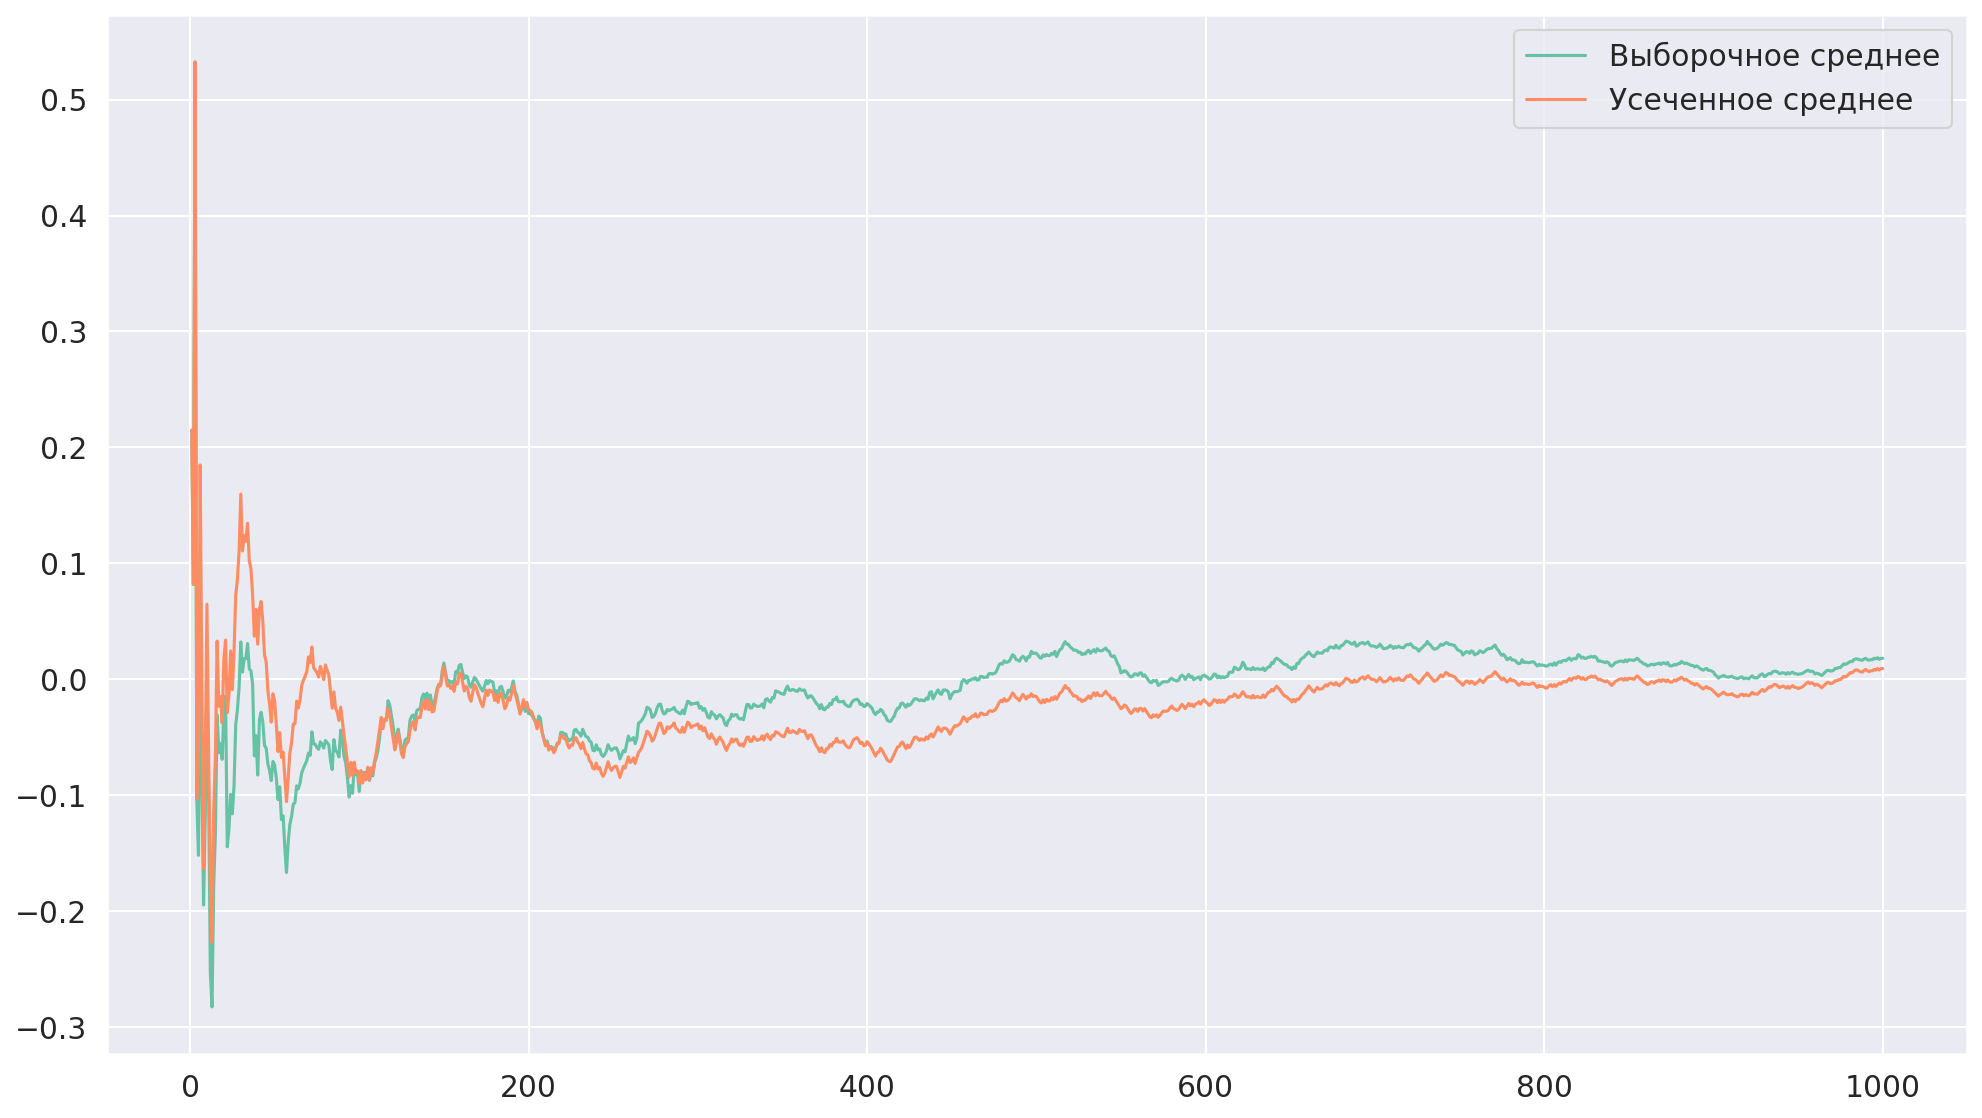

In [25]:
n = np.arange(1000, dtype = np.int64) + 1
sample = sps.norm.rvs(size = n[-1])

plt.figure(figsize = (16, 9), dpi = 150)
plt.plot(n, 
         np.cumsum(sample) / n, 
         label = "Выборочное среднее")

plt.plot(n,
         [sps.trim_mean(sample[:i], 0.2) for i in n] ,
          label = "Усеченное среднее")
plt.legend()

**Вывод:** <...>